P.V.M.Vamsi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
import cv2

In [3]:
# Load the data
img_data = np.load("olivetti_faces.npy")
label = np.load("olivetti_faces_target.npy")

In [10]:
# data info
print("No of images in the dataset:",len(img_data))
print("No of unique persons in the dataset:",len(np.unique(label)))
print("Uniqie persons labels:",np.unique(label))

No of images in the dataset: 400
No of unique persons in the dataset: 40
Uniqie persons labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [34]:
# Display faces with their ids
def display(im,ids):
    num_subjects = len(ids)
    cols = 10
    rows = num_subjects * 10 // cols
    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 20))

    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            subject_id = ids[index // 10]
            axarr[i, j].imshow(im[index], cmap="gray")
            axarr[i, j].set_xticks([])
            axarr[i, j].set_yticks([])
            axarr[i, j].set_title("Label: {}".format(subject_id))

    plt.show()


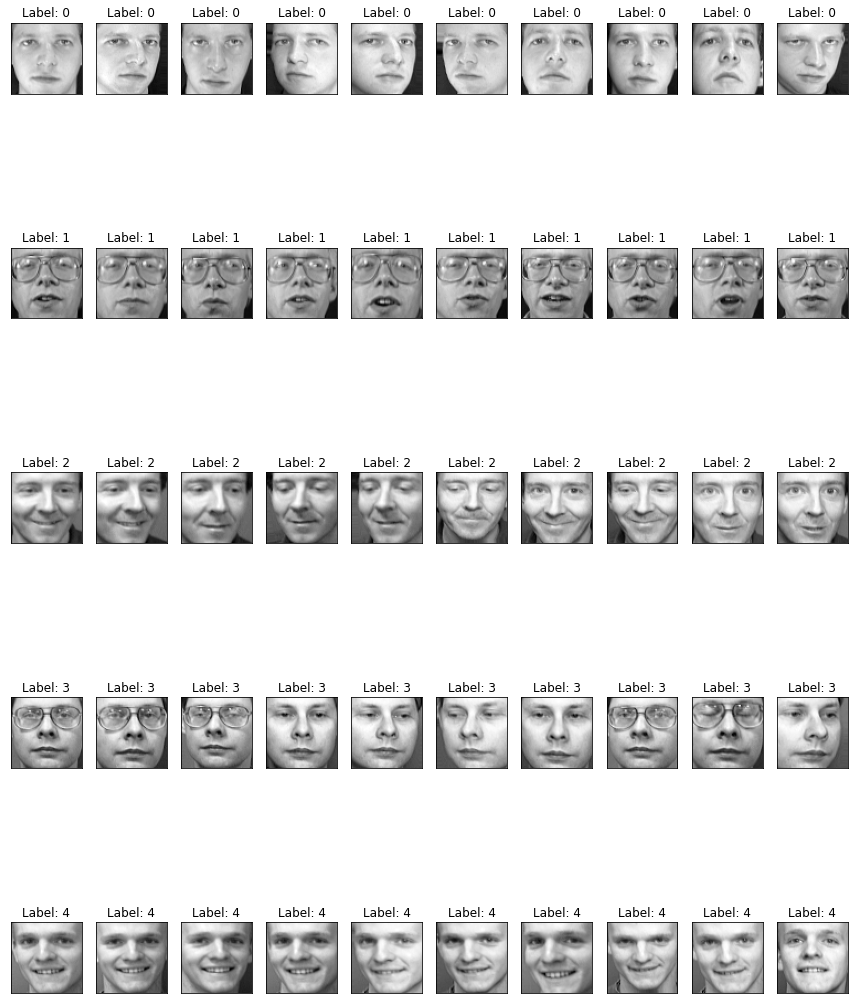

In [35]:
display(img_data,list(range(5)))

In [36]:
# reshaping the images
img_data_reshaped = img_data.reshape(img_data.shape[0],img_data.shape[1]*img_data.shape[2])

In [42]:
print("Size of dataset before reshaping:",img_data.shape)
print("Size of dataset after reshaping:",img_data_reshaped.shape)

Size of dataset before reshaping: (400, 64, 64)
Size of dataset after reshaping: (400, 4096)


In [121]:
#Train and Target data splitting
#considering 70 to 30 ratio for traing and testing
r_train,r_test,y_train,y_test = train_test_split(img_data_reshaped,label,test_size = 0.3,stratify = label,random_state =0) 
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("r_train shape:",r_train.shape)
print("y_train shape",y_train.shape)

r_train shape: (280, 4096)
y_train shape (280,)


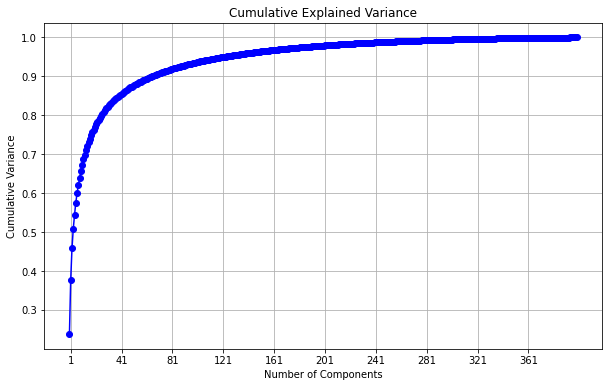

In [81]:
#finding the best number of componets required to caputers the info of whole data
pca_test = PCA().fit(img_data_reshaped)
# Cumulative Explained Variance:
# The cumulative explained variance at a certain point (e.g., the first k components) tells you the total proportion of variance explained by those components combined.
# It helps in deciding how many components to retain for dimensionality reduction.
cumulative_variance = np.cumsum(pca_test.explained_variance_ratio_)
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xticks([i for i in range(1,401)]) 
plt.locator_params(axis="x", nbins=10)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()

In [90]:
#fixing the n_components as 105 with cumulative variance = 0.9404 i.e I am retaing 94.04% of the data
n = 105

In [92]:
pca = PCA(n_components = n,whiten = True)
pca.fit(r_train)

PCA(n_components=105, whiten=True)

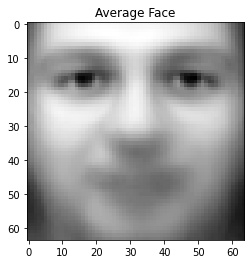

In [93]:
# Display average face
plt.imshow(pca.mean_.reshape((64, 64)), cmap="gray")
plt.title("Average Face")
plt.show()

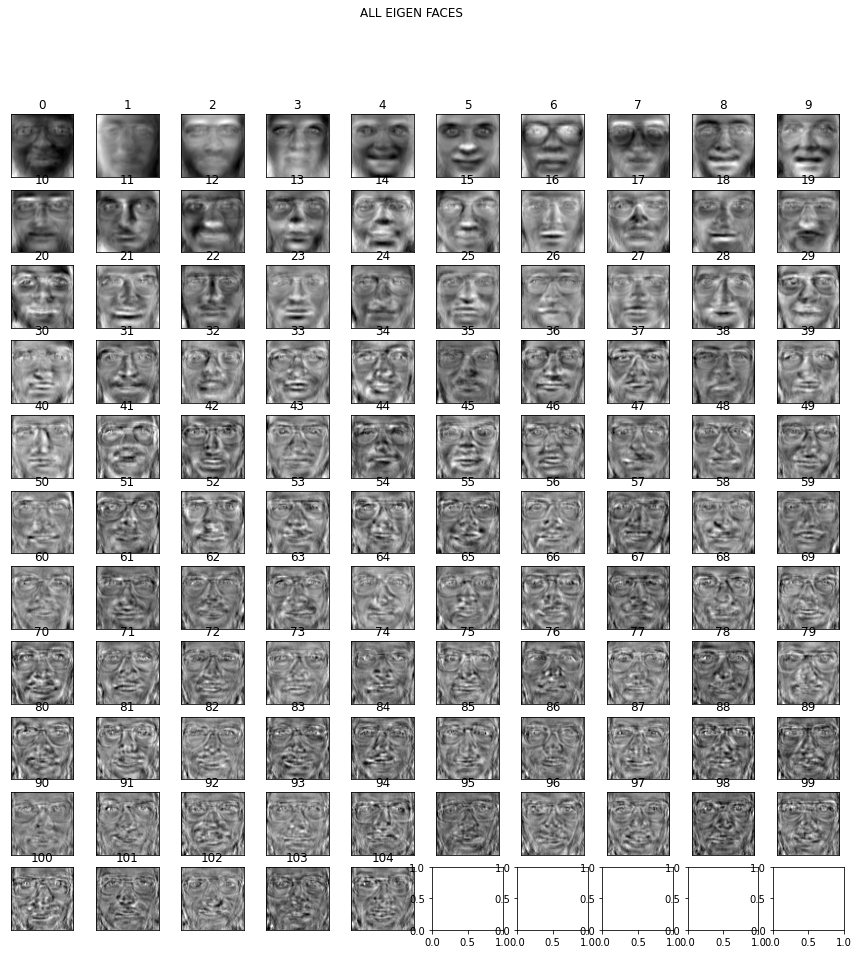

In [103]:
#eigen faces
eigen_faces =pca.components_.reshape((n,img_data.shape[1],img_data.shape[2]))
cols=10
rows=11
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
ax=ax.flatten()
for i in range(n):
    ax[i].imshow(eigen_faces[i],cmap="gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title("{}".format(i))
plt.suptitle("ALL EIGEN FACES")
plt.show()

In [104]:
# Transform data using PCA
r_train_pca = pca.transform(r_train)
r_test_pca = pca.transform(r_test)

In [109]:
clf = SVC()
clf.fit(r_train_pca, y_train)
y_pred = clf.predict(r_test_pca)
print("y_pred:",y_pred)
print("y_test:",y_test)
print("accuracy:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

y_pred: [39 10 33  3 37 10 28  4 27 20  5  7 28  6 13  3 35 26  9 13  2 27 38 39
 16 35 14  2 34 37 11 32 12 22 28  3 39  7 33  9  5 14 39 34  6 33 20 24
 34  8 36 31 17 21 18 20 35 22 39 36 16 29 25 30 32 38 17 36  8 11 10 25
 38  9 26 15 17  2  6 11 29 18 16  0 20 13 38 32  8 21 31  5  1 19 23 27
 37  1 29 30 19  3 22 14 19 15 39 15 23 24 20 26 18 24 30  4 23  1  0 12]
y_test: [ 4 10 33  7 37 10 28  4 27  2  5  7 28  6 13  3 35 26  9 13 25 27 38  0
 16 35 14  2 34 37 11 32 12 22 28  3  0  7 33  9  5 14 39 34  6 33 20 24
 34  8 36 31 17 21 18 20 35 22 39 36 16 29 25 30 32 21 17 36  8 11 10 25
 38  9 26 15 17  2  6 11 29 18 16 31 12 13 38 32  8 21 31  5  1 19 23 27
 37  1 29 30 19  3 22 14 19 15 39 15 23 24 20 26 18 24 30  4 23  1  0 12]
accuracy:0.93


In [110]:
#different classification models
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=9)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
for name, model in models:
    
    clf=model
    clf.fit(r_train_pca, y_train)
    y_pred=clf.predict(r_test_pca)
    print(10*"/","{} Result".format(name).upper(),10*"/")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

////////// LDA RESULT //////////
Accuracy score:0.93

////////// LR RESULT //////////
Accuracy score:0.93

////////// NB RESULT //////////
Accuracy score:0.85

////////// KNN RESULT //////////
Accuracy score:0.58

////////// DT RESULT //////////
Accuracy score:0.62

////////// SVM RESULT //////////
Accuracy score:0.93



In [130]:
# Function to add noise to images
def noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0.0, 1.0)
    return noisy_images

In [131]:
r_test_reshaped = r_test.reshape((r_test.shape[0],img_data.shape[1],img_data.shape[2]))
img_noisy = noise(r_test_reshaped)
img_noisy_reshaped = img_noisy.reshape(img_noisy.shape[0],img_noisy.shape[1]*img_noisy.shape[2])

In [132]:
r_noisy_test_pca = pca.transform(img_noisy_reshaped)

In [133]:
#different classification models
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=9)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
for name, model in models:
    
    clf=model
    clf.fit(r_train_pca, y_train)
    y_pred=clf.predict(r_noisy_test_pca)
    print(10*"/","{} Result".format(name).upper(),10*"/")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

////////// LDA RESULT //////////
Accuracy score:0.93

////////// LR RESULT //////////
Accuracy score:0.93

////////// NB RESULT //////////
Accuracy score:0.70

////////// KNN RESULT //////////
Accuracy score:0.47

////////// DT RESULT //////////
Accuracy score:0.54

////////// SVM RESULT //////////
Accuracy score:0.92

